## PIPELINE
### 1. load model face_detection
### 2. extract embeddings from dataset
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

# PIPELINE: model 4, embeddings flag, dataset https://universe.roboflow.com/skt/baby_posture

**Import dependencies**

In [12]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import numpy as np
from ultralytics import YOLO

import os
from pathlib import Path
import cv2
import pandas as pd
from retrieval import ImageRetrieval
from classifier import Classifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [2]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline


In [3]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v3", "extract_features")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Feature extraction for each dataset image-------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40

In [4]:
emb_builder.features

,eye1,eye2,nose,mouth,head,image_path,label
0,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.1361273229122162, 0.2808919847011566, 0.271...",2460_png_jpg.rf.7e7dedbe50b96b8c1da6a09294db1b...,2
1,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.657985508441925, 0.500365138053894, 0.12121...",frame_1_jpeg_jpg.rf.b6693f13598ea1f37d0012013d...,1
2,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)",frame_11_10_png_jpg.rf.4abf681b9d6728feace7188...,2
3,"(0.19975051283836365, 0.8758165240287781)","(-1, -1)","(0.2462371289730072, 0.8919802904129028)","(-1, -1)","(0.16650274395942688, 0.8363549113273621, 0.32...",754_png_jpg.rf.59651df83ac0799b66b9c0c9902a5a6...,1
4,"(0.7478657364845276, 0.9559367895126343)","(0.7463187575340271, 0.6804515719413757)","(0.7093610763549805, 0.8535811305046082)","(0.6505976915359497, 0.8408597707748413)","(0.7984833717346191, 0.6680458188056946, 0.402...",80_jpg.rf.335be5e3e8664408e1f37b7d29441f9a.jpg,2
...,...,...,...,...,...,...,...
4153,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.894865870475769, 0.6023584604263306, 0.2024...",Miku_11_JPG_jpg.rf.82121c400a430d97a3ecbd19ab8...,2
4154,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.7131965160369873, 0.1467168629169464, 0.417...",1939_png_jpg.rf.4308a72c5f44d7828157799a80af04...,2
4155,"(0.5971673130989075, 0.17314878106117249)","(0.714370608329773, 0.17253334820270538)","(0.6706162691116333, 0.2007918357849121)","(0.6518487930297852, 0.23809000849723816)","(0.5387385487556458, 0.16019687056541443, 0.42...",Supine_155_jpg.rf.5bd9e50269a2550f260beb9acd6c...,1
4156,"(0.4434019923210144, 0.21250195801258087)","(0.5100415945053101, 0.20283493399620056)","(0.48185548186302185, 0.2322489321231842)","(0.4845752716064453, 0.2739652693271637)","(0.4663172662258148, 0.20152811706066132, 0.19...",Supine_20_jpg.rf.95e18250dad85394454fe66fe6257...,1


## 2. Extract embeddings from dataset

**Create embeddings**

In [5]:
embeddings = emb_builder.embedding_flags()


Creation of flags features embedding------------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40%-->    1700 / 4158 files processed
43%-->    1800 / 4158 files processed
45%-->    1900 / 4158 files processed
48%-->    2000 / 4158 files processed
50%-->    2100 / 4158 files processed
52%-->    2200 / 4158 files processed
55%-->    2300 / 4158 files processed
57%-->    240

In [6]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,1
...,...,...,...,...
4153,0,0,0,0
4154,0,0,0,0
4155,1,1,1,1
4156,1,1,1,1


## 3. Retrieval to evaluate embedding goodness

In [7]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths)

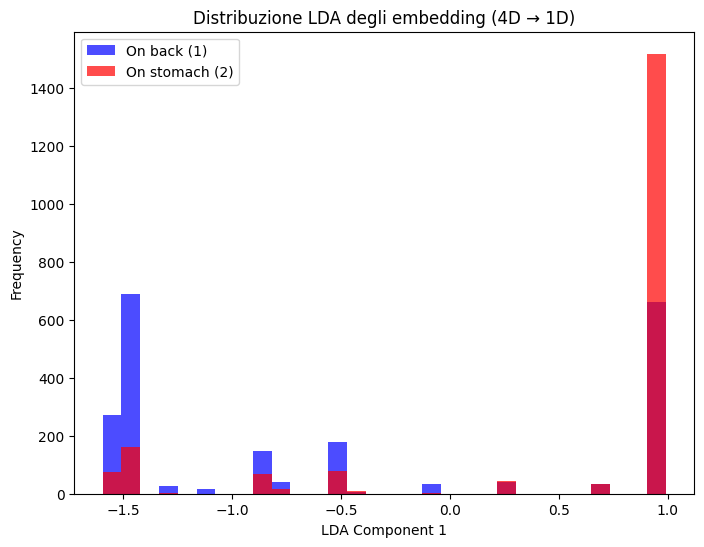

In [8]:
ret.plot_lda()

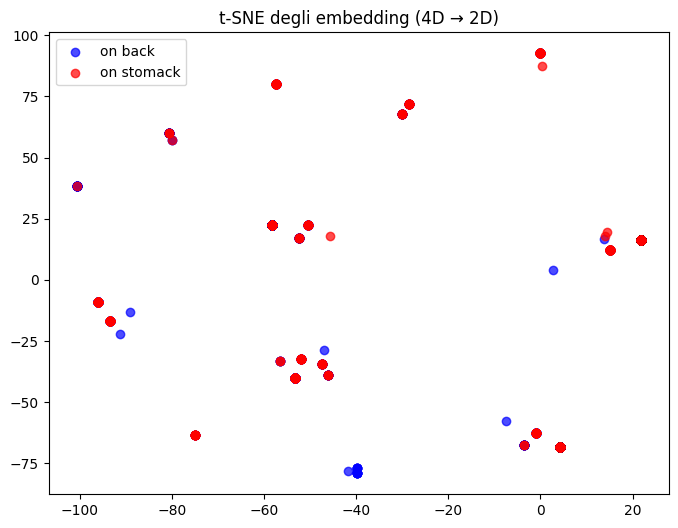

In [9]:
ret.plot_tsne()

In [10]:
ret.embeddings_norm

array([[          0,           0,           0,           0],
       [          0,           0,           0,           0],
       [          0,           0,           0,           0],
       ...,
       [        0.5,         0.5,         0.5,         0.5],
       [        0.5,         0.5,         0.5,         0.5],
       [          0,           0,           0,           0]])

In [11]:
ret.build_index()
ret.precision_at_k(k=10, verbose=True)

Average retrieval accuracy at 10: 0.616



Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.76      0.64      0.70       426
baby_on_stomach       0.68      0.79      0.73       406

       accuracy                           0.71       832
      macro avg       0.72      0.71      0.71       832
   weighted avg       0.72      0.71      0.71       832

Confusion matrix---------------------------------------


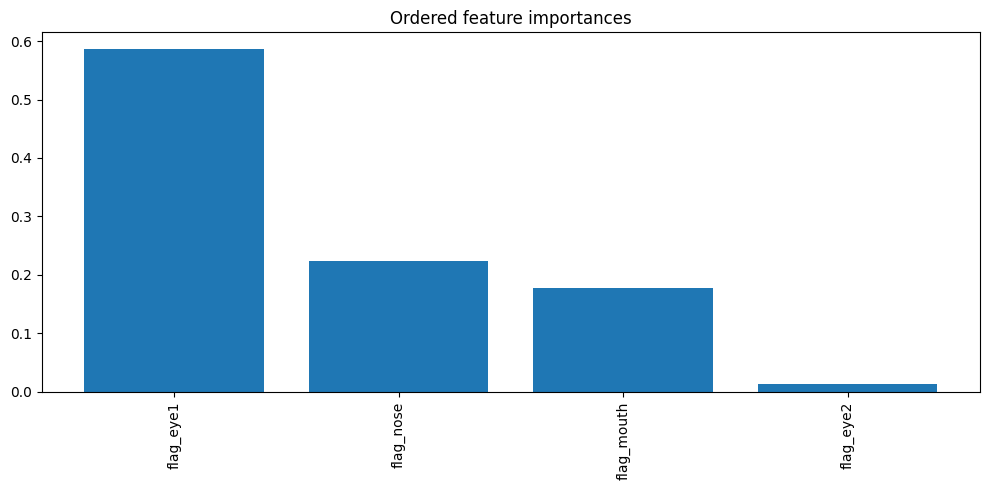

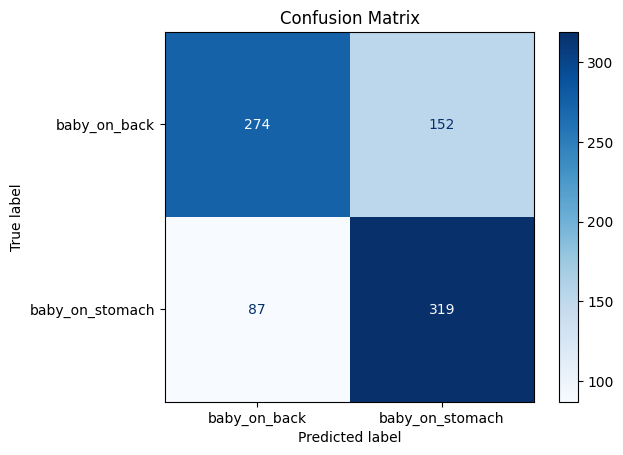

In [16]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

# PIPELINE: model 4, embeddings all features, dataset https://universe.roboflow.com/skt/baby_posture

## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [17]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline


In [18]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v3", "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: ../datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------


## 2. Extract embeddings from dataset

**Create embeddings**

In [19]:
embeddings = emb_builder.embedding_all_features()


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40%-->    1700 / 4158 files processed
43%-->    1800 / 4158 files processed
45%-->    1900 / 4158 files processed
48%-->    2000 / 4158 files processed
50%-->    2100 / 4158 files processed
52%-->    2200 / 4158 files processed
55%-->    2300 / 4158 files processed
57%-->    240

In [20]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,face_vertical_length,face_angle_vertical,face_angle_horizontal,symmetry_diff
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.840860,0.275490,0.060125,122.830696,147.334481,0.085138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
4154,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
4155,1,1,1,1,0.597167,0.173149,0.714371,0.172533,0.670616,0.200792,0.651849,0.238090,0.117205,0.041754,83.913839,126.519640,0.051653
4156,1,1,1,1,0.443402,0.212502,0.510042,0.202835,0.481855,0.232249,0.484575,0.273965,0.067337,0.041805,120.912051,106.596983,0.007047


## 3. Retrieval to evaluate embedding goodness

In [21]:
ret = ImageRetrieval( embeddings, emb_builder.y, emb_builder.image_paths)

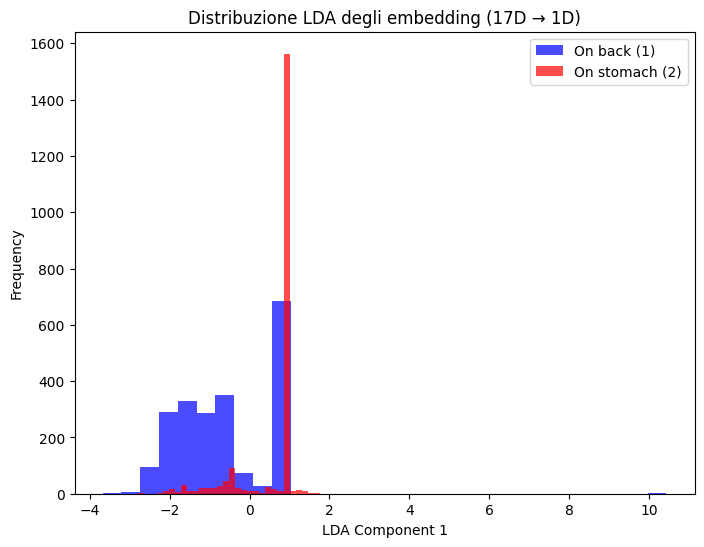

In [22]:
ret.plot_lda()

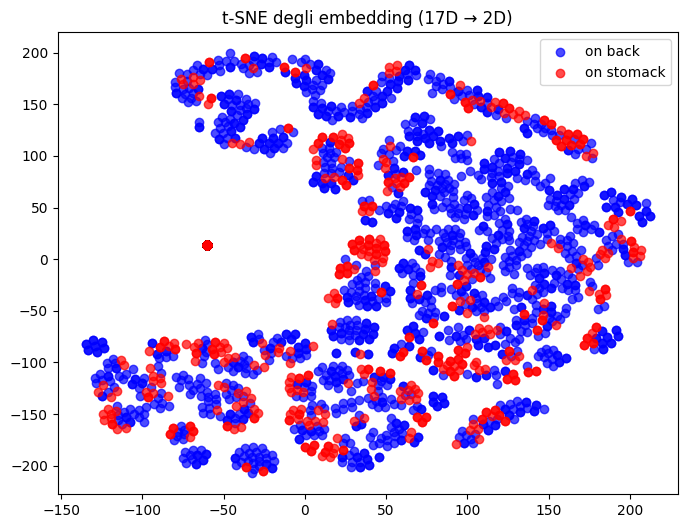

In [23]:
ret.plot_tsne()

In [24]:
ret.build_index()
ret.precision_at_k(k=10, verbose=True)

Average retrieval accuracy at 10: 0.685


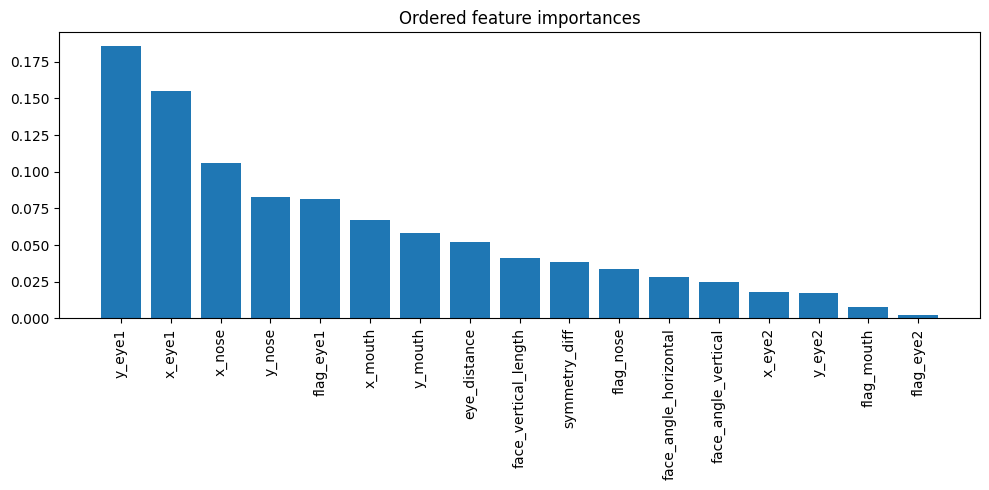

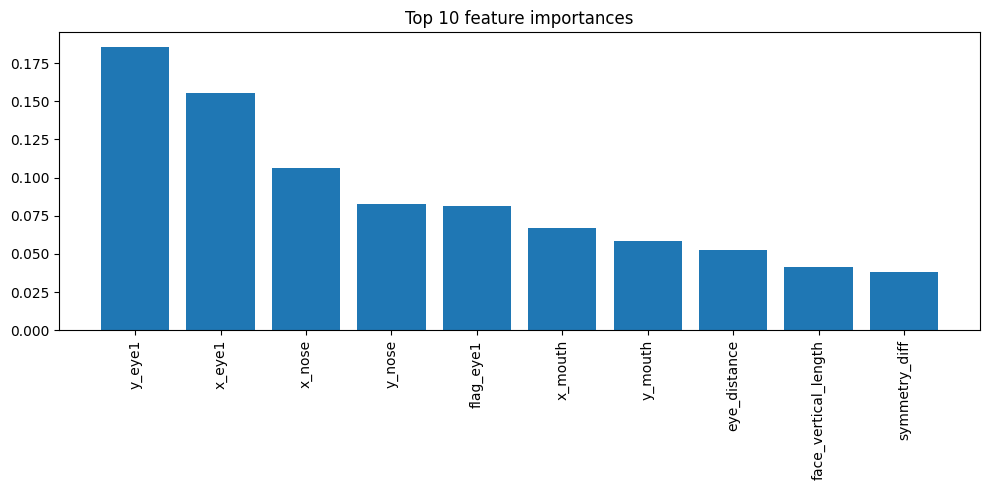


Dataset labels:----------------------------------------
{'baby_on_back': 1, 'baby_on_stomach': 2}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.92      0.66      0.77       426
baby_on_stomach       0.72      0.94      0.82       406

       accuracy                           0.79       832
      macro avg       0.82      0.80      0.79       832
   weighted avg       0.82      0.79      0.79       832

Confusion matrix---------------------------------------


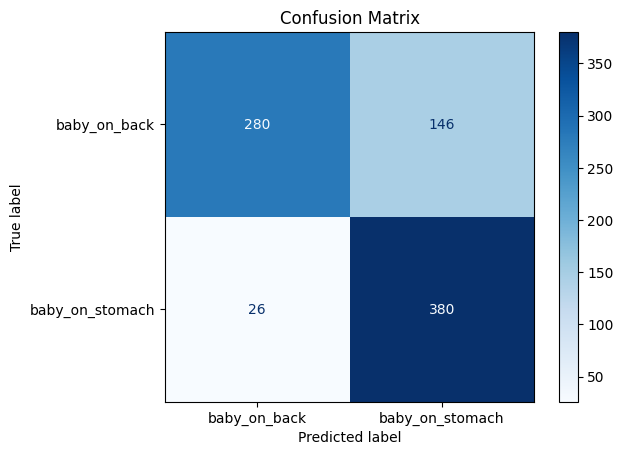

In [25]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

# PIPELINE: model 4, embeddings all features norm, dataset https://universe.roboflow.com/skt/baby_posture

**Import dependencies**

In [2]:
%load_ext autoreload
%autoreload 2

import os

from embeddings import EmbeddingBuilder
from retrieval import ImageRetrieval
from classifier import Classifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [3]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline


In [4]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v3", "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: ../datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------


## 2. Extract embeddings from dataset

**Create embeddings**

In [5]:
embeddings = emb_builder.embedding_all_features_norm()


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40%-->    1700 / 4158 files processed
43%-->    1800 / 4158 files processed
45%-->    1900 / 4158 files processed
48%-->    2000 / 4158 files processed
50%-->    2100 / 4158 files processed
52%-->    2200 / 4158 files processed
55%-->    2300 / 4158 files processed
57%-->    240

In [15]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-7.346064,-3.560087,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.519790,-1.998541,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.395011
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,...,-6.005907,-1.195665,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.837183
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.814792,1.258686,0.275490,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.117486,-1.660141,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2.591322
4154,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.402138,-6.815849,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.643094
4155,1,1,1,1,0.597167,0.173149,0.714371,0.172533,0.670616,0.200792,...,1.209954,1.486234,0.117205,0.277495,0.041754,0.179785,83.913839,126.519640,0.051653,0.549858
4156,1,1,1,1,0.443402,0.212502,0.510042,0.202835,0.481855,0.232249,...,1.039154,1.359439,0.067337,0.353005,0.041805,0.172737,120.912051,106.596983,0.007047,1.268730


## 3. Retrieval to evaluate embedding goodness

In [6]:
ret = ImageRetrieval( embeddings, emb_builder.y, emb_builder.image_paths)

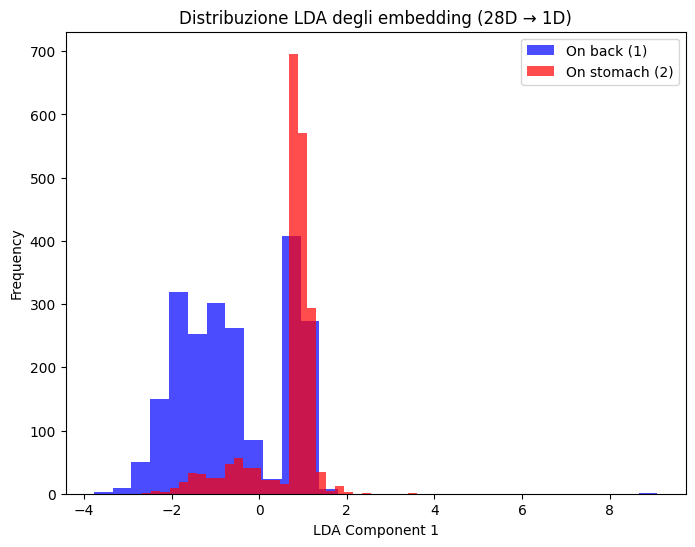

In [7]:
ret.plot_lda()

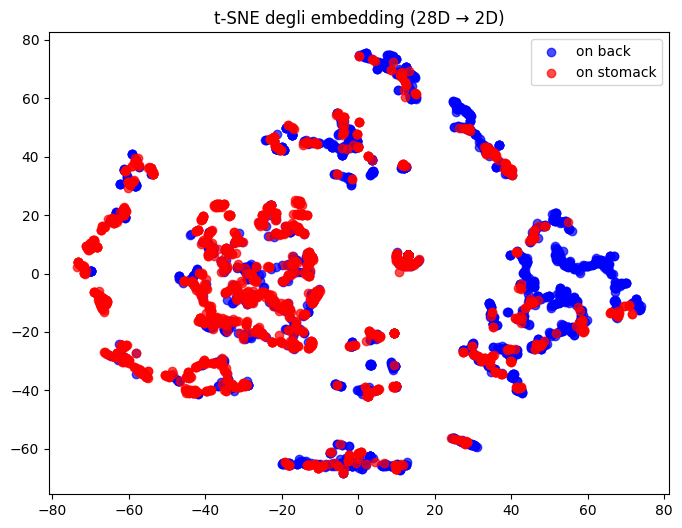

In [8]:
ret.plot_tsne()

In [9]:
ret.build_index()
ret.precision_at_k(k=10, verbose=True)

Average retrieval accuracy at 10: 0.727


In [57]:
distances, image_paths_similar = ret.retrieve_similar(idx_query=0, k=10, verbose=False)

In [ ]:
ret.show_images(image_paths_similar)

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


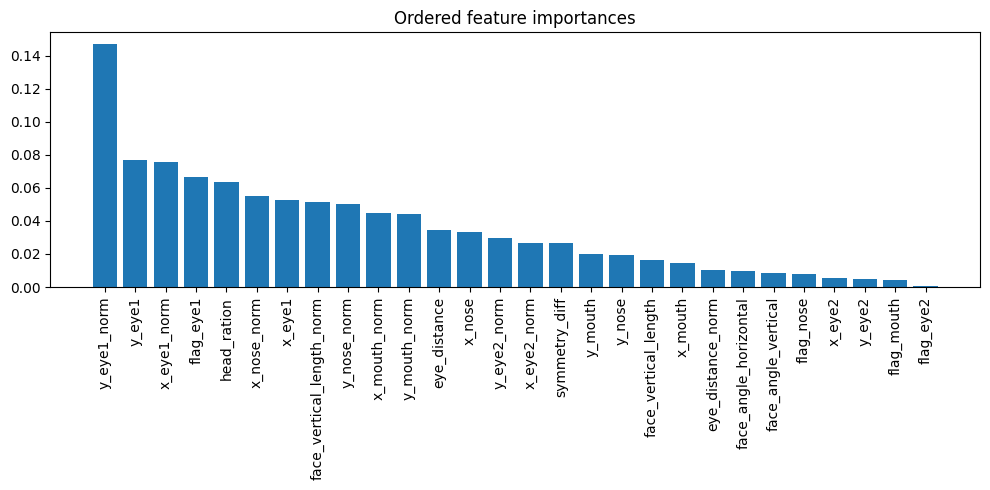

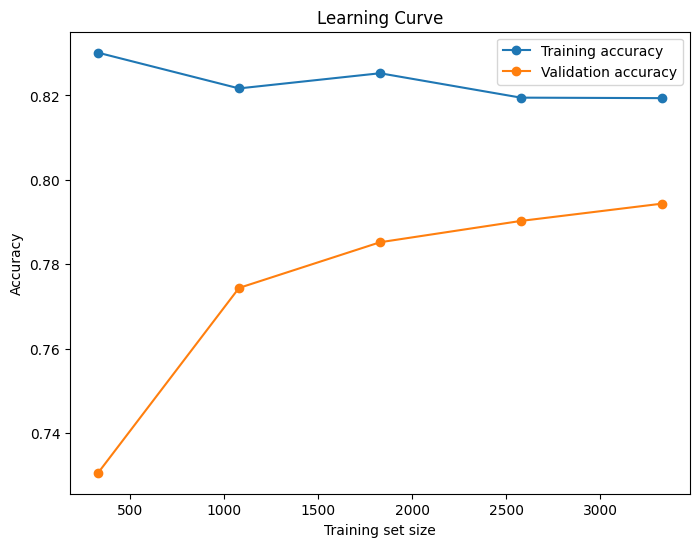


Dataset labels:----------------------------------------
{'baby_on_back': 0, 'baby_on_stomach': 1}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.87      0.68      0.76       426
baby_on_stomach       0.73      0.89      0.80       406

       accuracy                           0.78       832
      macro avg       0.80      0.79      0.78       832
   weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


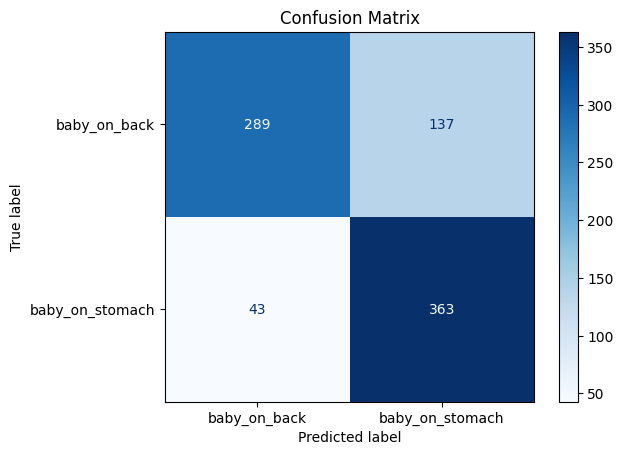

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


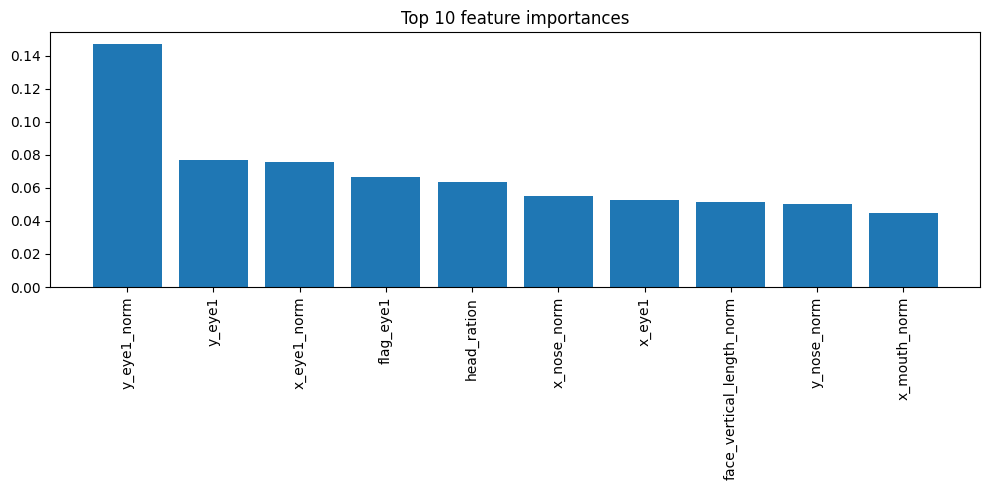

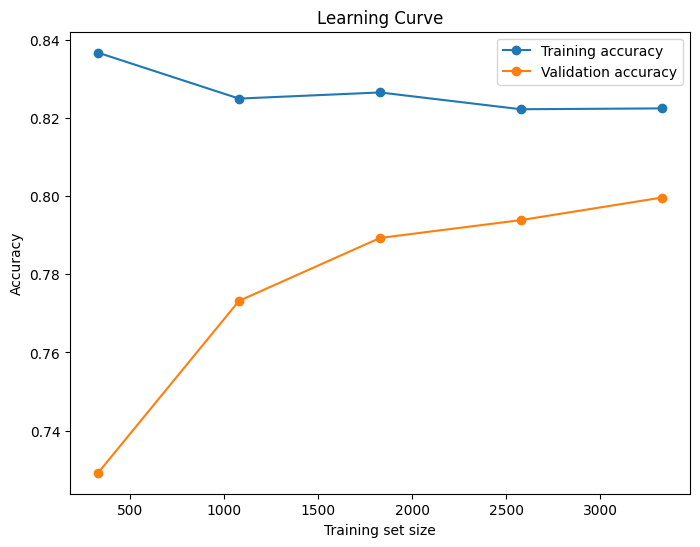


Dataset labels:----------------------------------------
{'baby_on_back': 0, 'baby_on_stomach': 1}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.88      0.67      0.76       426
baby_on_stomach       0.72      0.90      0.80       406

       accuracy                           0.78       832
      macro avg       0.80      0.79      0.78       832
   weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


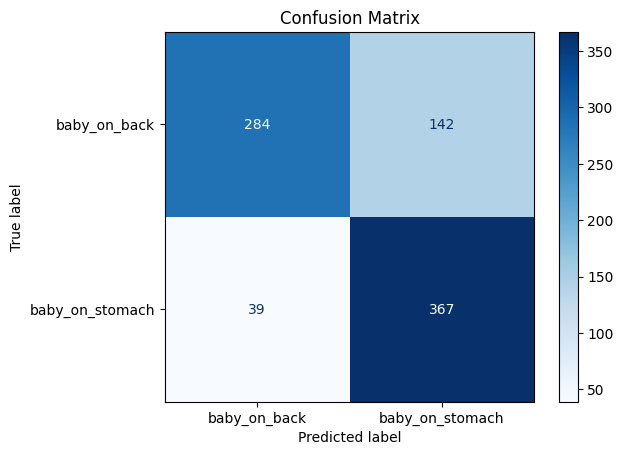

In [31]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


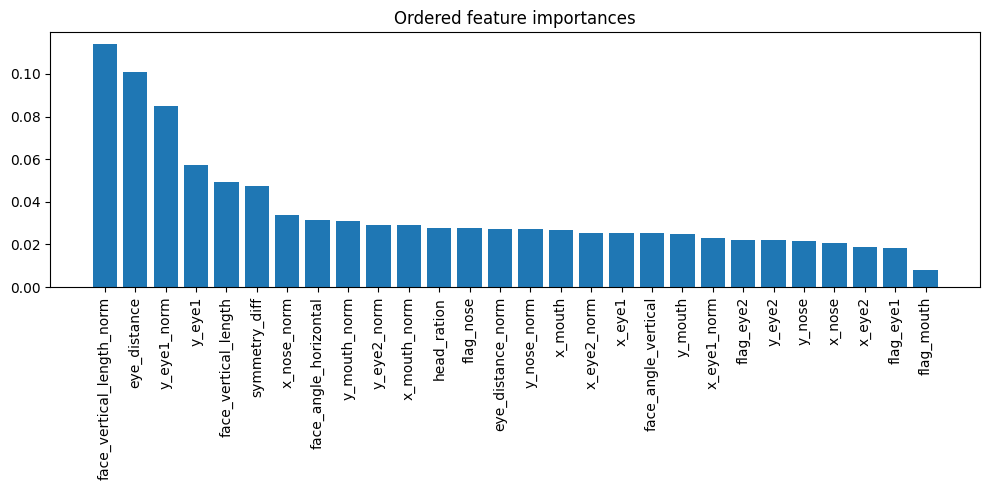

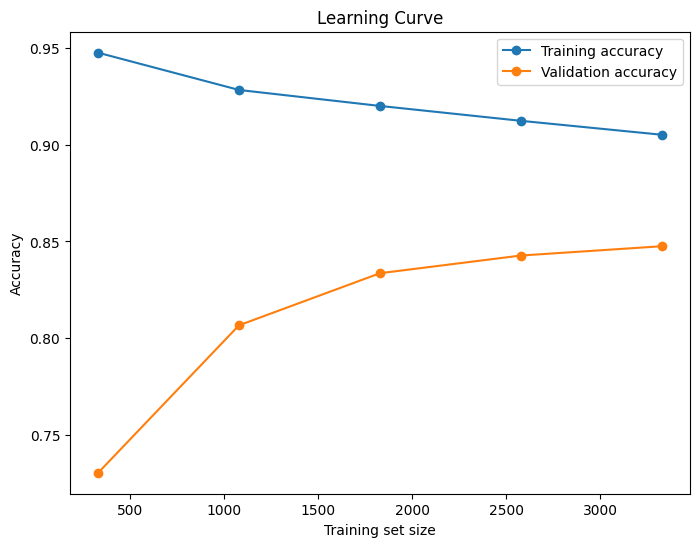


Dataset labels:----------------------------------------
{'baby_on_back': 0, 'baby_on_stomach': 1}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.88      0.78      0.83       426
baby_on_stomach       0.80      0.89      0.84       406

       accuracy                           0.84       832
      macro avg       0.84      0.84      0.84       832
   weighted avg       0.84      0.84      0.83       832

Confusion matrix---------------------------------------


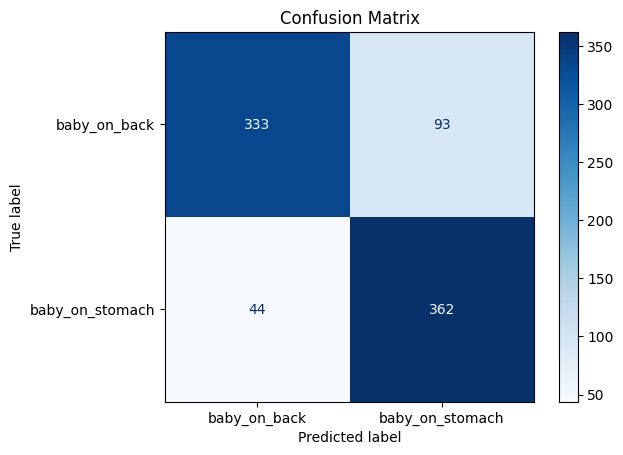

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


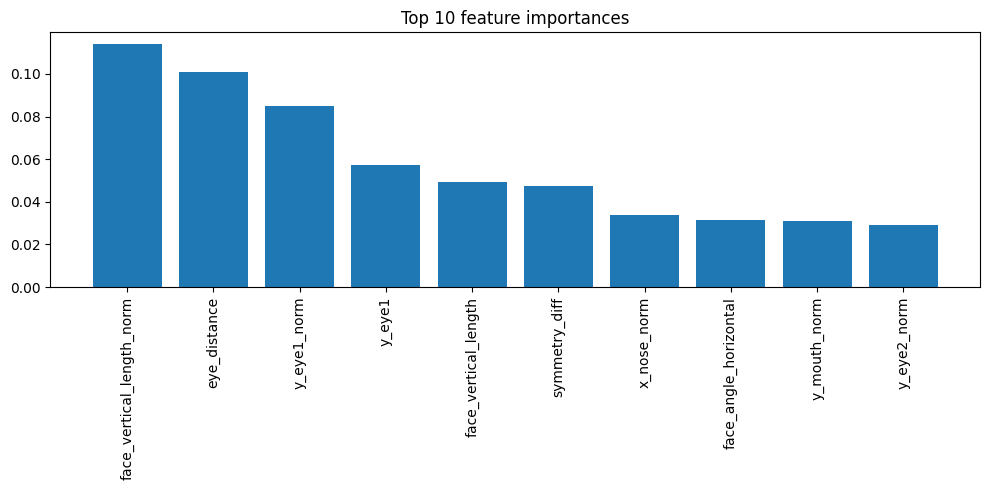

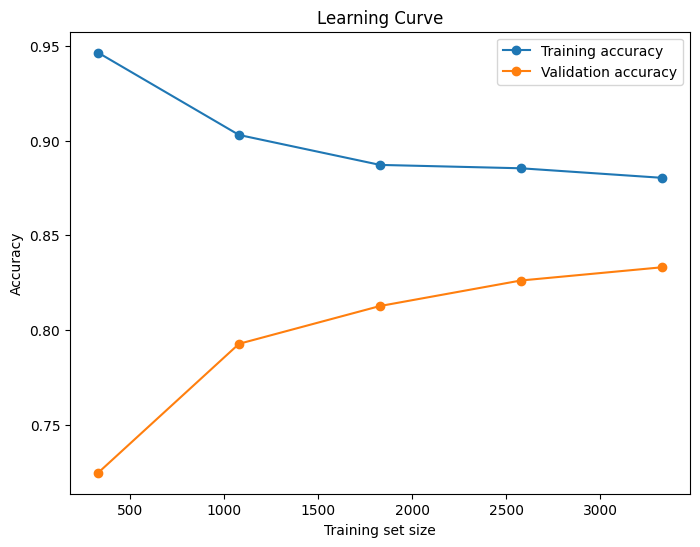


Dataset labels:----------------------------------------
{'baby_on_back': 0, 'baby_on_stomach': 1}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.87      0.76      0.81       426
baby_on_stomach       0.78      0.88      0.83       406

       accuracy                           0.82       832
      macro avg       0.82      0.82      0.82       832
   weighted avg       0.82      0.82      0.82       832

Confusion matrix---------------------------------------


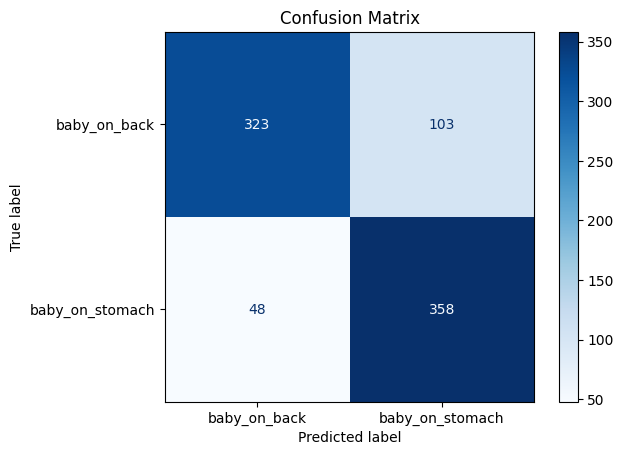

In [32]:
clf.XGBC()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


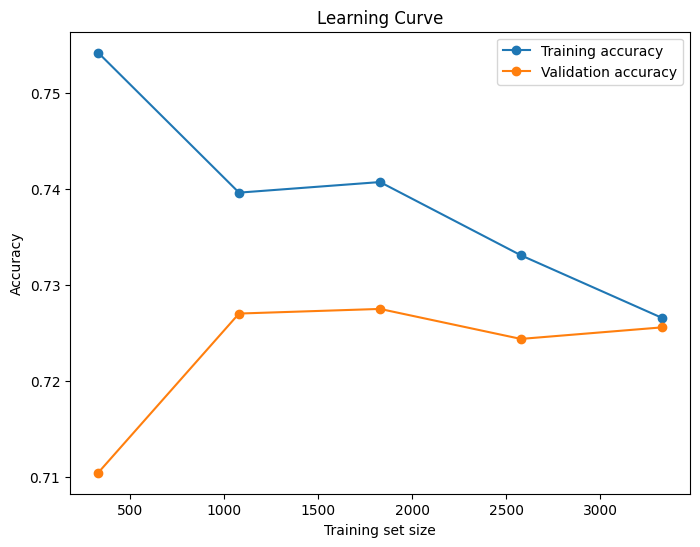


Dataset labels:----------------------------------------
{'baby_on_back': 0, 'baby_on_stomach': 1}

Report-------------------------------------------------
                 precision    recall  f1-score   support

   baby_on_back       0.76      0.65      0.70       426
baby_on_stomach       0.68      0.79      0.73       406

       accuracy                           0.72       832
      macro avg       0.72      0.72      0.72       832
   weighted avg       0.72      0.72      0.72       832

Confusion matrix---------------------------------------


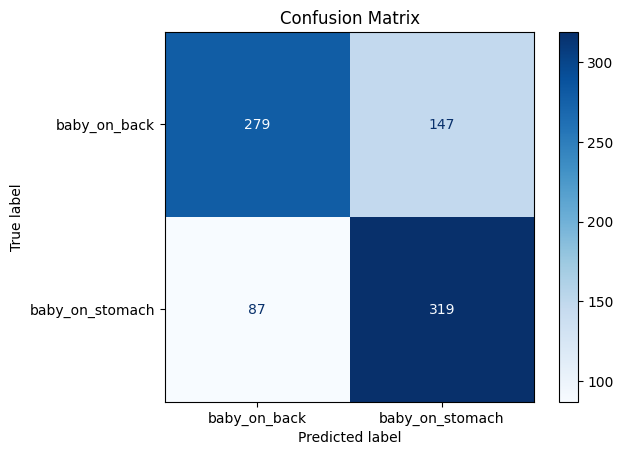

In [34]:
clf.logistic_regression()